# This code aggregates values by day-of-week for the top 30 highest traffic stations, then displays a bar chart with the average traffic on each day

In [1]:
import numpy as np
import pandas as pd
from os.path import join, isfile
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white") #lolidk

In [2]:
## SET THESE VALUES TO CUSTOMIZE CHART AT END
number_of_stations = 30                                   # will get top X stations by total traffic
highlight_stations = ['TIMES SQ-42 ST', '34 ST-HERALD SQ',
                      '23 ST', '42 ST-PORT AUTH',
                     '14 ST-UNION SQ'] # PLEASE DOUBLE CHECK THIS -- SHOULD BE STATIONS NEAR
                      #                                                                   TECH OFFICES

In [3]:
dataframes = []

for filepath in [join('BensonData', f) for f in listdir('BensonData')]:
    new_df = pd.read_csv(filepath, index_col=0)
    dataframes.append(new_df)

df1 = pd.concat(dataframes)
df1.reset_index(inplace=True)

In [4]:
df2 = (df1.sort_values(by=['STATION', 'LINENAME'])
          .groupby(['STATION', 'LINENAME'])['TOTAL_TRAFFIC']
          .sum())

In [5]:
df2.sort_values(ascending=False, inplace=True)
df2[:number_of_stations]

STATION          LINENAME    
GRD CNTRL-42 ST  4567S           27852140.0
34 ST-HERALD SQ  BDFMNQRW        21893193.0
34 ST-PENN STA   ACE             15704563.0
14 ST-UNION SQ   LNQR456W        14406701.0
42 ST-PORT AUTH  ACENQRS1237W    14078973.0
TIMES SQ-42 ST   1237ACENQRSW    12801085.0
FULTON ST        2345ACJZ        12064174.0
47-50 STS ROCK   BDFM            11039468.0
59 ST COLUMBUS   ABCD1           11034421.0
FLUSHING-MAIN    7               10757264.0
PATH NEW WTC     1               10457698.0
JKSN HT-ROOSVLT  EFMR7            9313648.0
34 ST-PENN STA   123ACE           9066183.0
W 4 ST-WASH SQ   ABCDEFM          8571632.0
86 ST            456              8544807.0
CANAL ST         JNQRZ6W          8481817.0
59 ST            456NQRW          8169286.0
LEXINGTON AV/53  EM6              7843091.0
42 ST-BRYANT PK  BDFM7            7817272.0
96 ST            123              7802660.0
72 ST            123              7142366.0
BEDFORD AV       L                6719205.0
34

In [6]:
df1.set_index(['STATION', 'LINENAME'], inplace=True)

In [7]:
topX_totaltraffic = df2[:number_of_stations]
stlntuples = topX_totaltraffic.index.tolist()
minidf1 = df1[df1.index.isin(stlntuples)]

In [8]:
minidf1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 640222 entries, (34 ST-HERALD SQ, BDFMNQRW) to (BOROUGH HALL, 2345R)
Data columns (total 17 columns):
index            640222 non-null int64
C/A              640222 non-null object
UNIT             640222 non-null object
SCP              640222 non-null object
DIVISION         640222 non-null object
DATE             640222 non-null object
TIME             640222 non-null object
DESC             640222 non-null object
ENTRIES          640222 non-null int64
EXITS            640222 non-null int64
DATETIME         640222 non-null object
WEEKDAY          640222 non-null int64
ENTRY_DIFFS      615961 non-null float64
EXIT_DIFFS       621419 non-null float64
TOTAL_TRAFFIC    613104 non-null float64
DDATE            640222 non-null object
DWEEKDAY         640222 non-null int64
dtypes: float64(3), int64(5), object(9)
memory usage: 84.9+ MB


In [9]:
df_dweekday_means = (minidf1.sort_values(by=['STATION', 'LINENAME']).reset_index()
                    .groupby(['STATION', 'LINENAME', 'DWEEKDAY', 'DDATE']).sum().reset_index()
                    .groupby(['STATION', 'LINENAME', 'DWEEKDAY']).mean())

In [10]:
df_dweekday_means.reset_index(level=['DWEEKDAY'], inplace=True)
df_dweekday_means.head(7)

DWEEKDAY         index       ENTRIES         EXITS  \
STATION LINENAME                                                       
125 ST  ACBD             0  4.268117e+06  2.989281e+09  2.482731e+09   
        ACBD             1  4.271303e+06  2.989606e+09  2.482943e+09   
        ACBD             2  4.298252e+06  3.017378e+09  2.506284e+09   
        ACBD             3  4.272459e+06  2.989954e+09  2.483226e+09   
        ACBD             4  3.986385e+06  2.795126e+09  2.321714e+09   
        ACBD             5  4.269576e+06  2.989174e+09  2.482572e+09   
        ACBD             6  4.267547e+06  2.988615e+09  2.481983e+09   

                     WEEKDAY   ENTRY_DIFFS    EXIT_DIFFS  TOTAL_TRAFFIC  
STATION LINENAME                                                         
125 ST  ACBD       14.117647  27056.823529  21978.411765   49035.235294  
        ACBD      110.117647  28982.705882  23413.647059   52396.352941  
        ACBD      207.294118  28944.117647  23636.823529   52580.941176  
        ACBD      302.117647  29402.117647  23758.647059   53160.764706  
        ACBD      370.444444  24740.166667  19507.333333   44247.500000  
        ACBD      493.176471  22714.470588  20556.176471   43270.647059  
        ACBD      490.941176  18081.294118  17393.352941   35474.647059

In [11]:
plotdata = df_dweekday_means.groupby(['DWEEKDAY']).mean()
plotdata

,index,ENTRIES,EXITS,WEEKDAY,ENTRY_DIFFS,EXIT_DIFFS,TOTAL_TRAFFIC
DWEEKDAY,,,,,,,
0,1.777998e+07,1.070265e+10,1.005232e+10,17.786275,50090.494118,43988.692157,93289.564706
1,1.780830e+07,1.067945e+10,1.000953e+10,197.643137,54436.886275,47741.452941,101339.203922
2,1.780753e+07,1.074399e+10,1.005839e+10,377.321569,54349.870588,47692.462745,101003.937255
3,1.776515e+07,1.068202e+10,1.003309e+10,555.870588,55096.370588,48501.492157,102750.750980
4,1.677221e+07,1.008591e+10,9.469966e+09,693.717079,45826.244502,41585.969333,86696.034205
5,1.774353e+07,1.068589e+10,1.005199e+10,913.321569,27385.017647,25874.478431,52676.586275
6,1.766119e+07,1.060837e+10,9.965714e+09,962.929412,23201.274510,20905.298039,43610.425490


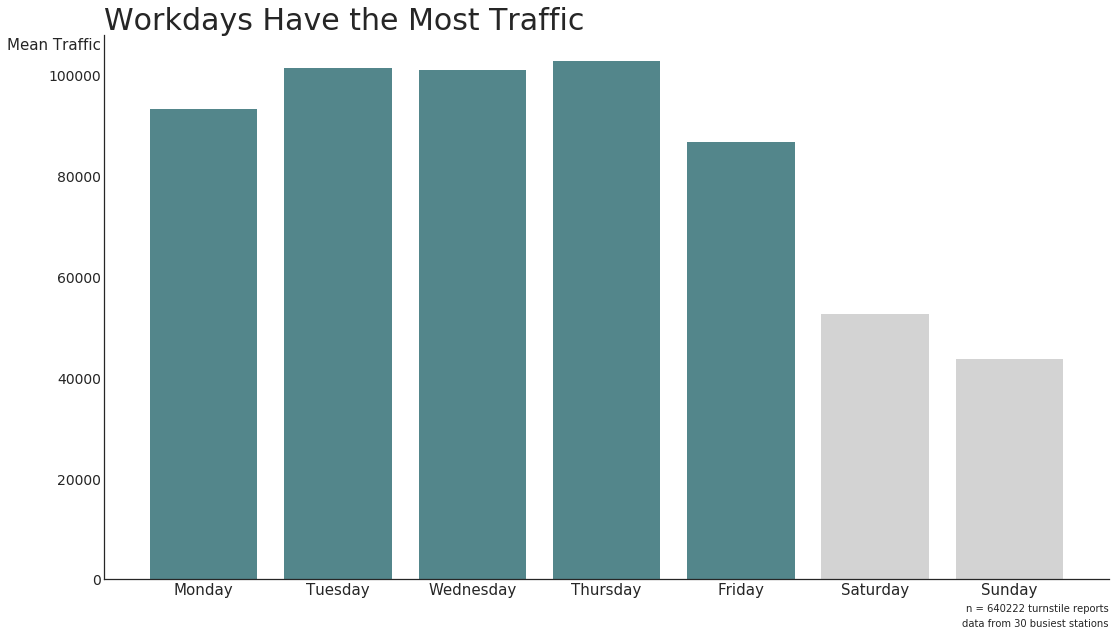

In [22]:
plt.figure(figsize=[18,10])

plt.bar(plotdata.index.tolist(), plotdata['TOTAL_TRAFFIC'], color=['#53868B', '#53868B', '#53868B', '#53868B', '#53868B', 'lightgray', 'lightgray'])


ticks_x =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = plt.gca()

plt.title("Workdays Have the Most Traffic", size=30, loc='left')
plt.xticks(np.arange(0,7), ticks_x, size = 15)
plt.yticks(np.arange(0,120000, 20000), size = 14)
#plt.legend(bbox_to_anchor=(1.01,1))
plt.ylabel("Mean Traffic", rotation=0, labelpad = 75, size = 15)
sns.despine()
ax.yaxis.set_label_coords(-0.05, 0.97)
plt.gcf().text(0.79,0.08, "n = 640222 turnstile reports")
plt.gcf().text(0.787,0.06, "data from 30 busiest stations")
plt.savefig('MeanTraffic-Test.svg')

In [14]:
littleframe['DWEEKDAY'].values[-1]

4